# Homework Recap

### Problem 1: Hamming Distance

### Problem 2: Substring with the Lowest Hamming Distance

### Problem 3: Edit distance with linear memory (without backtracking)

# Dot Matrices in Bioinformatics

## What are Dot Matrices?

Dot matrices are a visualization technique used in bioinformatics to compare two sequences, whether they are nucleotide or amino acid sequences. This technique involves creating a matrix in which each cell represents a comparison between corresponding elements in the two sequences. A dot is placed in the matrix where a match is found based on a predefined criterion.



### Construction of Dot Matrices:

- **Alignment along Axes:**
  - Sequences are aligned along the X and Y axes of a matrix.
  - A dot is placed in the matrix where the corresponding residues (nucleotides or amino acids) in the two sequences match based on a predefined criterion.

- **Visual Representation:**
  - Diagonal lines of dots suggest regions where the sequences are similar or align.

## Task 1: Construct simple Dot matrix

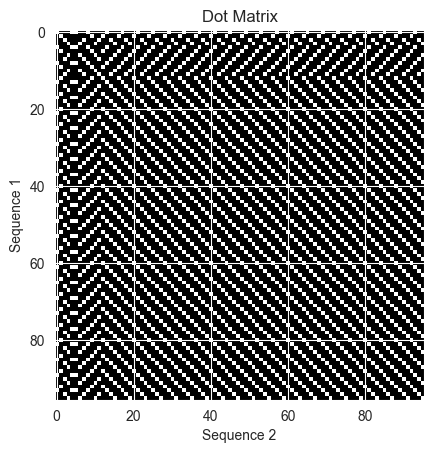

In [3]:
import matplotlib.pyplot as plt

def construct_dot_matrix(seq1, seq2):
    matrix_size = (len(seq1), len(seq2))
    dot_matrix = [[0 for _ in range(matrix_size[1])] for _ in range(matrix_size[0])]

    #your code goes here
    for i in range(matrix_size[0]):
        for j in range(matrix_size[1]):
            if seq1[i] == seq2[j]:
                dot_matrix[i][j] = 1    
    return dot_matrix

def plot_dot_matrix(dot_matrix):
    plt.imshow(dot_matrix, cmap='gray', interpolation='nearest')
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')
    plt.title('Dot Matrix')
    plt.show()

# Example Usage:
sequence1 = "ATGCATCGATCGTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGC"
sequence2 = "ATGCAACGATCGTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGC"

dot_matrix = construct_dot_matrix(sequence1, sequence2)
plot_dot_matrix(dot_matrix)


## Task 2: Construct Dot matrix based on 5-merthere is at least s, place dot if Hamming distance is 0 or 1. 

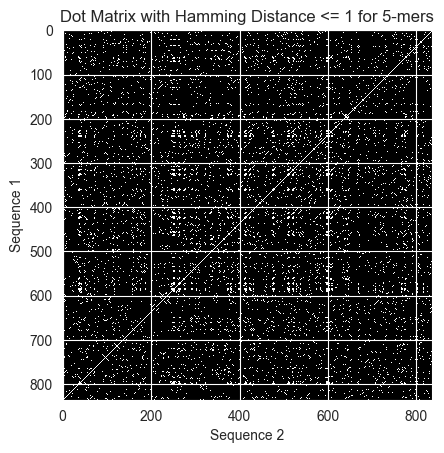

In [8]:
import matplotlib.pyplot as plt
from Bio.Seq import Seq

def hamming_distance(seq1, seq2):
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))


def construct_dot_matrix(sequence1, sequence2):
    kmer_length = 5
    dot_matrix = [[0] * (len(sequence2) - kmer_length + 1) for _ in range(len(sequence1) - kmer_length + 1)]
    
    #Your code goes here
    for i in range(len(sequence1) - kmer_length + 1):
        for j in range(len(sequence2) - kmer_length + 1):
            kmer1 = sequence1[i:i+kmer_length]
            kmer2 = sequence2[j:j+kmer_length]
            if hamming_distance(kmer1, kmer2) <= 1:
                dot_matrix[i][j] = 1
            
            # Compare with reverse complement
            reverse_complement = str(Seq(kmer2).reverse_complement())
            if hamming_distance(kmer1, reverse_complement) <= 1:
                dot_matrix[i][j] = 1
    return dot_matrix

# Example Usage:
sequence1 = "AAAGTTCGAACAATCTTGCGATTGTTAAGCTCAATTTGTTTGCTAGCATATTGCTTGCTTGTTAAAAATGTTTGTTGTCTTGAATTGAATCAAGACGCCCTACACATTTGGTTTGTCTTACTTTGTTCAGTTTTCAAAGGTCTACTTCATCGGAAGTGTCTCTCCGATTTGTTTCGGCTGCCGCAGCAACTTTTATATTATATCAAAGCGACAAGTGATTGTCAACTCTTTTTAAAAGTTTTTTTCGATTTCGTTTTTCGAAATCTTTCAGCAGCTCATTTATCGTAACTTATCGTTTGTTATTTGTCAAGAACTTTTTTTGAAGTTTTTTTCGATAGAATCAAGCTTCGTAAGCTGTTCTTTTTTAACGACTCAATTATCTTATCATGTCATCATCAACATGTCAATAACTATTTTTCAAGTTTTTTTAATGCTGCTTTATTTGCGTATTACTTAAAACAACAAAAATGAATATATCATGTAAATTTACACATGTCAATATATTTCTCAGCCTATTTTCCCTCGTACATTTGAATTTTGACCAAATAAATCGAGCATATCTTTTATAGTAGAAAAATAAAGACAAAAAAAAGAACACATAACACACTTGATGTTAAGTGTTCGACTGTTCCAACTGTACGAAGCGCTCAGAAATTGATTAAAATAGGTAAAGACTATTTATTTAGGATAAGTTGCTCCATCAACTGCTCATTGTATCCAATAAATAGAACTTCATCGATAATGATCAACGGACGTCTAAGGAGTTTTGTATGTTGTGTACATAAAGAAATCAGTTGTTTTTTTACCTACAGAGGAAAGGTCTATCGCAATGTTATGGAA"
sequence2 = "AAAGTTCGAACAATCTTGCGATTGTTAAGCTCAATTTGTTTGCTAGCATATTGCTTGCTTGTTAAAAATGTTTGTTGTCTTGAATTGAATCAAGACGCCCTACACATTTGGTTTGTCTTACTTTGTTCAGTTTTCAAAGGTCTACTTCATCGGAAGTGTCTCTCCGATTTGTTTCGGCTGCCGCAGCAACTTTTATATTATATCAAAGCGACAAGTGATTGTCAACTCTTTTTAAAAGTTTTTTTCGATTTCGTTTTTCGAAATCTTTCAGCAGCTCATTTATCGTAACTTATCGTTTGTTATTTGTCAAGAACTTTTTTTGAAGTTTTTTTCGATAGAATCAAGCTTCGTAAGCTGTTCTTTTTTAACGACTCAATTATCTTATCATGTCATCATCAACATGTCAATAACTATTTTTCAAGTTTTTTTAATGCTGCTTTATTTGCGTATTACTTAAAACAACAAAAATGAATATATCATGTAAATTTACACATGTCAATATATTTCTCAGCCTATTTTCCCTCGTACATTTGAATTTTGACCAAATAAATCGAGCATATCTTTTATAGTAGAAAAATAAAGACAAAAAAAAGAACACATAACACACTTGATGTTAAGTGTTCGACTGTTCCAACTGTACGAAGCGCTCAGAAATTGATTAAAATAGGTAAAGACTATTTATTTAGGATAAGTTGCTCCATCAACTGCTCATTGTATCCAATAAATAGAACTTCATCGATAATGATCAACGGACGTCTAAGGAGTTTTGTATGTTGTGTACATAAAGAAATCAGTTGTTTTTTTACCTACAGAGGAAAGGTCTATCGCAATGTTATGGAA"

dot_matrix = construct_dot_matrix(sequence1, sequence2_rc)

# Visualize Dot Matrix
plt.imshow(dot_matrix, cmap='gray', interpolation='nearest')
plt.xlabel('Sequence 2')
plt.ylabel('Sequence 1')
plt.title('Dot Matrix with Hamming Distance <= 1 for 5-mers')
plt.show()

## Task 3: Replace sequence1 and sequence2 with something more realistic.

In [ ]:
sequence1 = "AAAGTTCGAACAATCTTGCGATTGTTAAGCTCAATTTGTTTGCTAGCATATTGCTTGCTTGTTAAAAATGTTTGTTGTCTTGAATTGAATCAAGACGCCCTACACATTTGGTTTGTCTTACTTTGTTCAGTTTTCAAAGGTCTACTTCATCGGAAGTGTCTCTCCGATTTGTTTCGGCTGCCGCAGCAACTTTTATATTATATCAAAGCGACAAGTGATTGTCAACTCTTTTTAAAAGTTTTTTTCGATTTCGTTTTTCGAAATCTTTCAGCAGCTCATTTATCGTAACTTATCGTTTGTTATTTGTCAAGAACTTTTTTTGAAGTTTTTTTCGATAGAATCAAGCTTCGTAAGCTGTTCTTTTTTAACGACTCAATTATCTTATCATGTCATCATCAACATGTCAATAACTATTTTTCAAGTTTTTTTAATGCTGCTTTATTTGCGTATTACTTAAAACAACAAAAATGAATATATCATGTAAATTTACACATGTCAATATATTTCTCAGCCTATTTTCCCTCGTACATTTGAATTTTGACCAAATAAATCGAGCATATCTTTTATAGTAGAAAAATAAAGACAAAAAAAAGAACACATAACACACTTGATGTTAAGTGTTCGACTGTTCCAACTGTACGAAGCGCTCAGAAATTGATTAAAATAGGTAAAGACTATTTATTTAGGATAAGTTGCTCCATCAACTGCTCATTGTATCCAATAAATAGAACTTCATCGATAATGATCAACGGACGTCTAAGGAGTTTTGTATGTTGTGTACATAAAGAAATCAGTTGTTTTTTTACCTACAGAGGAAAGGTCTATCGCAATGTTATGGAA"
sequence2 = "AAAGTTCGAACAATCTTGCGATTGTTAAGCTCAATTTGTTTGCTAGCATATTGCTTGCTTGTTAAAAATGTTTGTTGTCTTGAATTGAATCAAGACGCCCTACACATTTGGTTTGTCTTACTTTGTTCAGTTTTCAAAGGTCTACTTCATCGGAAGTGTCTCTCCGATTTGTTTCGGCTGCCGCAGCAACTTTTATATTATATCAAAGCGACAAGTGATTGTCAACTCTTTTTAAAAGTTTTTTTCGATTTCGTTTTTCGAAATCTTTCAGCAGCTCATTTATCGTAACTTATCGTTTGTTATTTGTCAAGAACTTTTTTTGAAGTTTTTTTCGATAGAATCAAGCTTCGTAAGCTGTTCTTTTTTAACGACTCAATTATCTTATCATGTCATCATCAACATGTCAATAACTATTTTTCAAGTTTTTTTAATGCTGCTTTATTTGCGTATTACTTAAAACAACAAAAATGAATATATCATGTAAATTTACACATGTCAATATATTTCTCAGCCTATTTTCCCTCGTACATTTGAATTTTGACCAAATAAATCGAGCATATCTTTTATAGTAGAAAAATAAAGACAAAAAAAAGAACACATAACACACTTGATGTTAAGTGTTCGACTGTTCCAACTGTACGAAGCGCTCAGAAATTGATTAAAATAGGTAAAGACTATTTATTTAGGATAAGTTGCTCCATCAACTGCTCATTGTATCCAATAAATAGAACTTCATCGATAATGATCAACGGACGTCTAAGGAGTTTTGTATGTTGTGTACATAAAGAAATCAGTTGTTTTTTTACCTACAGAGGAAAGGTCTATCGCAATGTTATGGAA"

In [6]:
sequence2_rc = "TTCCATAACATTGCGATAGACCTTTCCTCTGTAGGTAAAAAAACAACTGATTTCTTTATGTACACAACATACAAAACTCCTTAGACGTCCGTTGATCATTATCGATGAAGTTCTATTTATTGGATACAATGAGCAGTTGATGGAGCAACTTATCCTAAATAAATAGTCTTTACCTATTTTAATCAATTTCTGAGCGCTTCGTACAGTTGGAACAGTCGAACACTTAACATCAAGTGTGTTATGTGTTCTTTTTTTTGTCTTTATTTTTCTACTATAAAAGATATGCTCGATTTATTTGGTCAAAATTCAAATGTACGAGGGAAAATAGGCTGAGAAATATATTGACATGTGTAAATTTACATGATATATTCATTTTTGTTGTTTTAAGTAATACGCAAATAAAGCAGCATTAAAAAAACTTGAAAAATAGTTATTGACATGTTGATGATGACATGATAAGATAATTGAGTCGTTAAAAAAGAACAGCTTACGAAGCTTGATTCTATCGAAAAAAACTTCAAAAAAAGTTCTTGACAAATAACAAACGATAAGTTACGATAAATGAGCTGCTGAAAGATTTCGAAAAACGAAATCGAAAAAAACTTTTAAAAAGAGTTGACAATCACTTGTCGCTTTGATATAATATAAAAGTTGCTGCGGCAGCCGAAACAAATCGGAGAGACACTTCCGATGAAGTAGACCTTTGAAAACTGAACAAAGTAAGACAAACCAAATGTGTAGGGCGTCTTGATTCAATTCAAGACAACAAACATTTTTAACAAGCAAGCAATATGCTAGCAAACAAATTGAGCTTAACAATCGCAAGATTGTTCGAACTTT"

### Task 4: Add reverse complement comparison to your previous solution

### Task5: Interpret the following dot matrices:

![Dot Matrix](matrix1.png)

![Dot Matrix](matrix2.png)

![Dot Matrix](matrix3.png)

![Dot Matrix](matrix4.png)

# Seed-and-Extend Paradigm in Sequence Alignment

## Introduction

The seed-and-extend paradigm is a widely used strategy in bioinformatics for efficiently aligning biological sequences such as DNA, RNA, or proteins. This paradigm enhances the speed and sensitivity of sequence alignment algorithms by combining the benefits of both exact matching (seeding) and local alignment extension.

## Components of Seed-and-Extend Paradigm

### 1. Seed Matching

- **Seeds:** Short, exact matches or approximate matches (seeds) are identified between the sequences. These seeds act as potential anchor points for alignment.

- **Heuristics:** Various heuristics are employed to efficiently select a subset of seeds, reducing the computational complexity of the algorithm. Common heuristics include spaced seeds or spaced k-mers.

### 2. Local Alignment Extension

- **Extension:** The identified seeds are extended into longer local alignments by aligning the regions surrounding the seeds. This step aims to refine and finalize the alignment by incorporating additional sequence information.

- **Scoring:** A scoring system is used to evaluate the quality of sequence alignments. This includes scoring matrices (such as BLOSUM or PAM matrices) for amino acid sequences or substitution matrices for nucleotide sequences.

- **Gap Penalties:** Gap penalties are introduced to penalize the introduction of gaps in the alignment. Affine gap penalties, where different penalties are applied for gap opening and gap extension, are commonly used.

## Advantages of Seed-and-Extend Paradigm

1. **Efficiency:** By focusing on potential alignment anchor points (seeds), the algorithm significantly reduces the search space, leading to faster alignments.

2. **Sensitivity:** The paradigm allows for the identification of distant homologs or regions of similarity that might be missed by traditional alignment methods.

3. **Applicability:** Seed-and-extend algorithms are versatile and can be applied to various types of biological sequences, making them suitable for a wide range of bioinformatics applications.

## Examples of Seed-and-Extend Algorithms

1. **BLAST (Basic Local Alignment Search Tool):** A widely used seed-and-extend algorithm for comparing biological sequences. It uses heuristics to identify high-scoring seeds and then extends them to find significant local alignments.

## Conclusion

The seed-and-extend paradigm has become a cornerstone in bioinformatics, enabling efficient and sensitive sequence alignments crucial for understanding biological relationships, functional annotations, and evolutionary studies.


### Task 1 - find exact seeds

Write a Python function to identify seeds (exact matches) between two DNA sequences. The function should take two sequences and a seed length as input and return a list of tuples representing the starting positions of identified seeds.



In [14]:
def find_seeds(sequence1, sequence2, seed_length):
    seeds = []
    for i in range(len(sequence1) - seed_length + 1):
        seed1 = sequence1[i:i+seed_length]
        for j in range(len(sequence2) - seed_length + 1):
            seed2 = sequence2[j:j+seed_length]
            if seed1 == seed2:
                seeds.append((i, j))
    
    return seeds

# Example Usage:
sequence1 = "ATGCGTAAAGCT"
sequence2 = "ATGCAAAAGCT"
seed_length = 3

result = find_seeds(sequence1, sequence2, seed_length)
print(result)


[(0, 0), (1, 1), (6, 4), (6, 5), (7, 6), (8, 7), (9, 8)]


### Task 2 - seed aggregation

Let's connect seeds that are trivially connected: they are exact and they go one after another

In [9]:

def aggregate_seeds(seeds):
    aggregated_regions = []

    if not seeds:
        return aggregated_regions

        # Sort seeds based on starting positions
    sorted_seeds = sorted(seeds, key=lambda x: x[0])

    start1 = sorted_seeds[0][0]
    current1  = sorted_seeds[0][0]
    start2 = sorted_seeds[0][1]
    current2 = sorted_seeds[0][1]

    for i in range(1, len(sorted_seeds)):
        if sorted_seeds[i][0] == current1 + 1 and sorted_seeds[i][1] == current2 + 1:
            # Extend the current region
            current1 = sorted_seeds[i][0]
            current2 = sorted_seeds[i][1]
        else:
            # Start a new region
            aggregated_regions.append(((start1, current1), (start2, current2)))
            start1 = sorted_seeds[i][0]
            current1 = sorted_seeds[i][0]
            start2 = sorted_seeds[i][1]
            current2 = sorted_seeds[i][1]

    # Add the last region
    aggregated_regions.append(((start1, current1), (start2, current2)))

    return aggregated_regions

# Example Usage:
seeds = [(1, 4), (2, 5), (8, 12), (9, 13)]
result = aggregate_seeds(seeds)
print(result)
# Output: [((1, 2), (4, 5)), ((8, 9), (12, 13))]




[((1, 2), (4, 5)), ((8, 9), (12, 13))]


### Task 3 - connect seeds
Let's connect seeds together, if their length is at least 3, and distance between them is not greater than one. 

In [10]:
def connect_seeds(seeds):
    aggregated_regions = []

    if not seeds:
        return aggregated_regions


    sorted_seeds = [tup for tup in seeds if tup[0][1] - tup[0][0] >= 3]


    start1 = sorted_seeds[0][0][0]
    end1  = sorted_seeds[0][0][1]
    start2 = sorted_seeds[0][1][0]
    end2 = sorted_seeds[0][1][1]

    for i in range(1, len(sorted_seeds)):

        if sorted_seeds[i][0][0] - end1  <= 2 and sorted_seeds[i][1][0] - end2 <= 2:
            # Extend the current region
            end1 = sorted_seeds[i][0][1]
            end2 = sorted_seeds[i][1][1]
        else:
            # Start a new region
            aggregated_regions.append(((start1, end1), (start2, end2)))
            start1 = sorted_seeds[i][0][0]
            end1  = sorted_seeds[i][0][1]
            start2 = sorted_seeds[i][1][0]
            end2 = sorted_seeds[i][1][1]

    # Add the last region
    aggregated_regions.append(((start1, end1), (start2, end2)))

    return aggregated_regions


seeds = [((1, 4), (2, 5)), ((6, 10), (6, 10)), ((11, 18), (12, 18))]
result = connect_seeds(seeds)
print(result)

[((1, 18), (2, 18))]


### Last task:

Apply previous code to the following sequences, seed length = 5. It can be tricky and require some code refactoring


In [9]:
sequence1 = "ATCGGACTAGTCGATCGTAGGCTAAAGGCTATGACTTACCTCGATGTTGA"
sequence2 = "ATCGTACGGCTAAAGGCTTGACTT"